In [1]:
import pandas as pd, ipywidgets as widgets, numpy as np, matplotlib.pyplot as plt, io

uploader = widgets.FileUpload(multiple = False)
display("Upload analyzed data")
display(uploader)

'Upload analyzed data'

FileUpload(value={}, description='Upload')

In [2]:
data_name = list(uploader.value.keys())[0]
data = pd.read_excel(io.BytesIO(uploader.value[data_name]['content']))
data

,Unnamed: 0,Experiment,iQue3 Plate,iQue3 384 Well ID,Well Type,Count of singlets,A2a MFI Ratio,A2a Averaged Raw MFI,A2b MFI Ratio,A2b Averaged Raw MFI,...,Well,Protein Name,Protein Concentration (ug/uL),Volume (uL),Yield (ug),Date Purified,BPP,Experiment Drug Plate,Experiment Well,Antibody Plate
0,1,22_10_10 A2a Primary Screen,Plate 1,A01,A2a,664,32.564648,930746.50,2.463158,70400.75,...,A1,PRJ133_015,0.93,240.0,223.2,9.26.22,BPP-618,1.0,A1,BPP-618 Plate 1
1,2,22_10_10 A2a Primary Screen,Plate 1,C01,A2a,383,40.433949,815856.00,1.912613,38591.75,...,B1,PRJ133_016,0.10,240.0,24.0,9.26.22,BPP-618,1.0,B1,BPP-618 Plate 1
2,3,22_10_10 A2a Primary Screen,Plate 1,E01,A2a,456,31.343387,1424494.25,5.111798,232321.00,...,C1,PRJ133_017,0.24,240.0,57.6,9.26.22,BPP-618,1.0,C1,BPP-618 Plate 1
3,4,22_10_10 A2a Primary Screen,Plate 1,G01,A2a,371,26.231775,1058832.50,3.375280,136241.50,...,D1,PRJ133_018,0.86,240.0,206.4,9.26.22,BPP-618,1.0,D1,BPP-618 Plate 1
4,5,22_10_10 A2a Primary Screen,Plate 1,I01,A2a,337,55.922923,845988.00,2.224604,33653.25,...,E1,PRJ133_019,0.87,240.0,208.8,9.26.22,BPP-618,1.0,E1,BPP-618 Plate 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,188,22_10_10 A2a Primary Screen,Plate 3,G08,A2a,492,1.180420,7828.25,1.212199,8039.00,...,NaN,Blank,NaN,NaN,NaN,NaN,NaN,3.0,D8,NaN
188,189,22_10_10 A2a Primary Screen,Plate 3,I08,A2a,1416,1.467422,9228.25,1.333492,8386.00,...,NaN,Blank,NaN,NaN,NaN,NaN,NaN,3.0,E8,NaN
189,190,22_10_10 A2a Primary Screen,Plate 3,K08,A2a,1575,4.471573,29238.50,1.167196,7632.00,...,NaN,Blank,NaN,NaN,NaN,NaN,NaN,3.0,F8,NaN
190,191,22_10_10 A2a Primary Screen,Plate 3,M08,A2a,1045,1.279911,8665.00,1.104136,7475.00,...,NaN,Blank,NaN,NaN,NaN,NaN,NaN,3.0,G8,NaN


In [3]:
data_cleaned = data[["Protein Name", "A2a MFI Ratio", "A2b MFI Ratio", "BPP"]]
data_cleaned = data_cleaned[data_cleaned["Protein Name"] != "Blank"]
data_cleaned

,Protein Name,A2a MFI Ratio,A2b MFI Ratio,BPP
0,PRJ133_015,32.564648,2.463158,BPP-618
1,PRJ133_016,40.433949,1.912613,BPP-618
2,PRJ133_017,31.343387,5.111798,BPP-618
3,PRJ133_018,26.231775,3.375280,BPP-618
4,PRJ133_019,55.922923,2.224604,BPP-618
...,...,...,...,...
175,PRJ135_082,4.984204,4.157251,BPP-619
176,PRJ135_039,3.651328,3.762389,BPP-619
177,PRJ135_065,3.423528,3.981754,BPP-619
178,PRJ135_068,2.755778,2.666356,BPP-619


In [5]:
controls = data_cleaned[data_cleaned["BPP"] == "Controls"]
controls

,Protein Name,A2a MFI Ratio,A2b MFI Ratio,BPP
85,TB192-5-IgG4,8.721669,5.961106,Controls
86,TB206-1_IgG4,44.965959,9.386710,Controls
87,TB194-11_IgG4,73.697358,2.330875,Controls
163,TB192-004 IGG4,4.301773,3.869275,Controls
164,TB194-011 IGG4,0.938382,0.833666,Controls


In [26]:
BPP618 = data_cleaned[data_cleaned["BPP"] == "BPP-618"]
TB206 = controls[controls["Protein Name"] == "TB206-1_IgG4"]
BPP618 = pd.concat([BPP618, TB206], axis = 0, ignore_index = True)
BPP618 = BPP618[["Protein Name", "A2a MFI Ratio"]]
BPP618
BPP618_sorted = BPP618.sort_values(by="A2a MFI Ratio", ascending = False)
TB206 = BPP618[BPP618["Protein Name"] == "TB206-1_IgG4"]
TB206
#BPP618_sorted.to_excel("BPP618 A2a Analyzed.xlsx")

,Protein Name,A2a MFI Ratio
85,TB206-1_IgG4,44.965959


In [18]:
BPP619 = data_cleaned[data_cleaned["BPP"] == "BPP-619"]
TB192 = controls[controls["Protein Name"] == "TB192-5-IgG4"]
BPP619 = pd.concat([BPP619, TB192], axis = 0, ignore_index=True)
BPP619 = BPP619[["Protein Name", "A2a MFI Ratio", "A2b MFI Ratio"]]
BPP619_sorted = BPP619.sort_values(by="A2b MFI Ratio", ascending = False)
#BPP619_sorted.to_excel("BPP619 A2b Analyzed.xlsx")

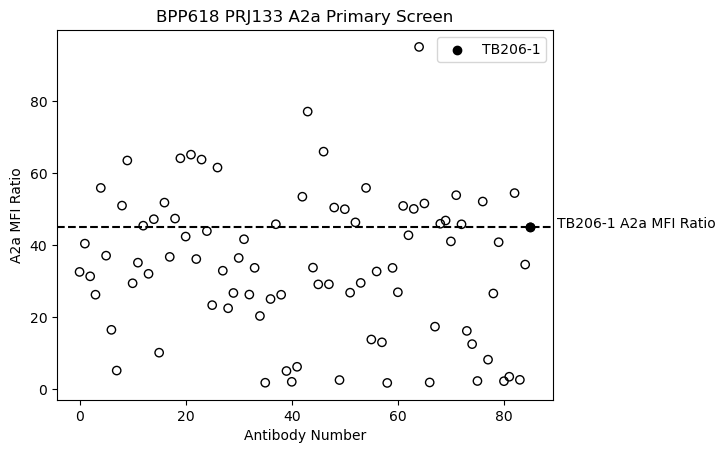

In [55]:
fig_618, ax_618 = plt.subplots()
ax_618.scatter(x = BPP618.index, y = BPP618["A2a MFI Ratio"], facecolors = "none", edgecolors = "black")
ax_618.scatter(x = TB206.index, y = TB206["A2a MFI Ratio"], label = "TB206-1", color = "black")
plt.axhline(y = TB206["A2a MFI Ratio"].values, color='black', linestyle='--')
ax_618.set_title("BPP618 PRJ133 A2a Primary Screen")
ax_618.set_xlabel("Antibody Number")
ax_618.set_ylabel("A2a MFI Ratio")
ax_618.legend()
plt.text(90, TB206["A2a MFI Ratio"], 'TB206-1 A2a MFI Ratio')
plt.show()

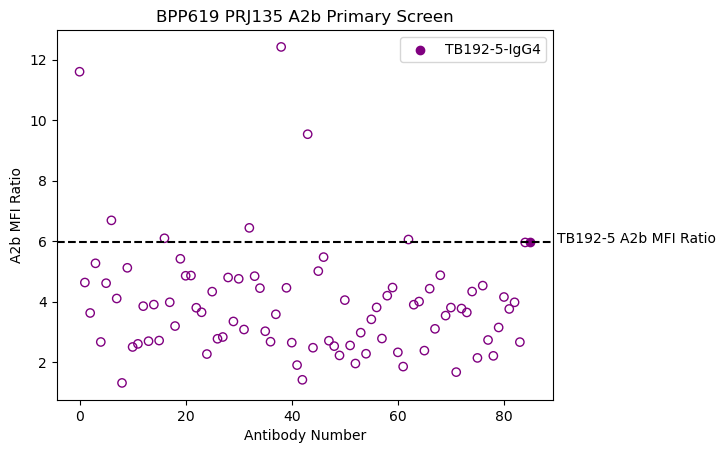

In [57]:
def plotter(bpp, control, value, color_dot):
    fig, ax = plt.subplots()
    ax.scatter(x = bpp.index, y = bpp[value], facecolors = "none", edgecolors = color_dot)
    ax.scatter(x = control.index, y = control[value], label = control["Protein Name"].values[0], color = color_dot)
    plt.axhline(y = control[value].values, color='black', linestyle='--')
    ax.set_xlabel("Antibody Number")
    ax.set_ylabel(value)
    ax.legend()
    return fig, ax
    
fig, ax = plotter(BPP619, TB192, "A2b MFI Ratio", "purple")
ax.set_title("BPP619 PRJ135 A2b Primary Screen")
plt.text(90, TB192["A2b MFI Ratio"], 'TB192-5 A2b MFI Ratio')
plt.show()

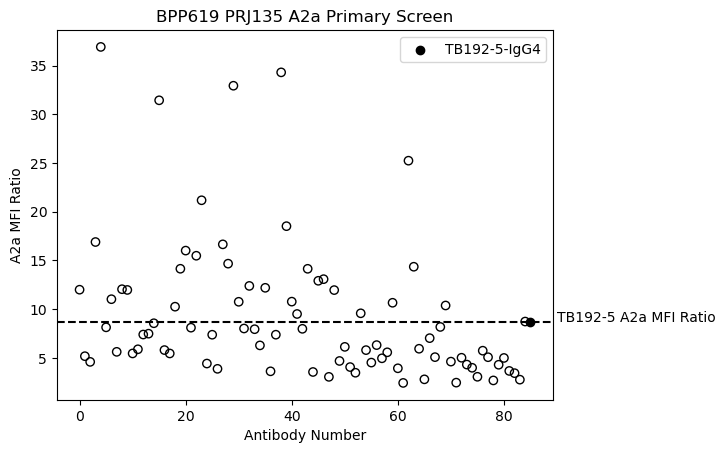

In [59]:
fig, ax = plotter(BPP619, TB192, "A2a MFI Ratio", "black")
ax.set_title("BPP619 PRJ135 A2a Primary Screen")
plt.text(90, TB192["A2a MFI Ratio"], 'TB192-5 A2a MFI Ratio')
plt.show()